In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

# 1 iteration

In [ ]:
immo_df = pd.read_csv("base_line.csv")
immo_df

## Premiére observation

In [ ]:
immo= immo_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [ ]:
plt.figure(figsize=(9,7))
corr_matrix = immo.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Heatmap nous montre une correlation possible entre total_bedrooms/households(0.97), total_bedrooms/total_rooms (0.93),  total_rooms/households(0.92), population/households (0.91), total_bedrooms/population (0.88) et enfin population/total_rooms (0.86) et median_income/median_house_value (0.69). 

In [ ]:
g = sns.PairGrid(data = immo, corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

# 2 iteration

In [ ]:
immo_df2 = pd.read_csv("immo_iteration2.csv")
immo_df2

In [ ]:
immo2= immo_df2[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

Confirme ce que l'on a pu observé 

In [ ]:
X= immo2.copy()

In [ ]:
y=immo_df2[['localisation']]

In [ ]:
ols = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
ols.summary()

In [ ]:
ols.params 

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
coefs_with_p_value = ols.pvalues.to_frame(name='p-values').iloc[1:]
coefs_with_p_value

## feature chose

In [ ]:
immo_df4 = pd.read_csv("immo_iteration9.csv")
immo_df4

In [ ]:
plt.figure(figsize=(9,7))
corr_matrix = immo_df4.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## feature importance

In [2]:
immo_df4 = pd.read_csv("immo_iteration10.csv")
immo_df4

,index,longitude,latitude,housing_median_age,total_bedrooms,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,room_per_households
0,2072.0,-119.84,36.77,6.0,473.0,1397.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0,4.443645
1,10600.0,-117.80,33.68,8.0,349.0,862.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0,5.976471
2,2494.0,-120.19,36.60,25.0,214.0,931.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0,4.088785
3,4284.0,-118.32,34.10,31.0,229.0,597.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0,2.740088
4,16541.0,-121.23,37.79,21.0,373.0,1130.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,278.0,745.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0,5.860000
16508,18898.0,-122.25,38.11,49.0,504.0,1131.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0,5.163755
16509,11798.0,-121.22,38.92,19.0,461.0,1206.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0,5.899767
16510,6637.0,-118.14,34.16,39.0,840.0,2546.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0,3.591203


In [3]:
immo_df4=immo_df4[['index','longitude','latitude','housing_median_age','total_bedrooms','median_income','population','room_per_households','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','median_house_value']]
immo_df4

,index,longitude,latitude,housing_median_age,total_bedrooms,median_income,population,room_per_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0,-119.84,36.77,6.0,473.0,1.4817,1397.0,4.443645,0.0,1.0,0.0,0.0,0.0,72000.0
1,10600.0,-117.80,33.68,8.0,349.0,6.9133,862.0,5.976471,1.0,0.0,0.0,0.0,0.0,274100.0
2,2494.0,-120.19,36.60,25.0,214.0,1.5536,931.0,4.088785,0.0,1.0,0.0,0.0,0.0,58300.0
3,4284.0,-118.32,34.10,31.0,229.0,1.5284,597.0,2.740088,1.0,0.0,0.0,0.0,0.0,200000.0
4,16541.0,-121.23,37.79,21.0,373.0,4.0815,1130.0,5.166667,0.0,1.0,0.0,0.0,0.0,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,278.0,3.0625,745.0,5.860000,0.0,1.0,0.0,0.0,0.0,93800.0
16508,18898.0,-122.25,38.11,49.0,504.0,2.6133,1131.0,5.163755,0.0,0.0,0.0,1.0,0.0,103100.0
16509,11798.0,-121.22,38.92,19.0,461.0,4.4958,1206.0,5.899767,0.0,1.0,0.0,0.0,0.0,192600.0
16510,6637.0,-118.14,34.16,39.0,840.0,2.5750,2546.0,3.591203,1.0,0.0,0.0,0.0,0.0,153500.0


In [4]:
data = immo_df4
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [5]:
X

,index,longitude,latitude,housing_median_age,total_bedrooms,median_income,population,room_per_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072.0,-119.84,36.77,6.0,473.0,1.4817,1397.0,4.443645,0.0,1.0,0.0,0.0,0.0
1,10600.0,-117.80,33.68,8.0,349.0,6.9133,862.0,5.976471,1.0,0.0,0.0,0.0,0.0
2,2494.0,-120.19,36.60,25.0,214.0,1.5536,931.0,4.088785,0.0,1.0,0.0,0.0,0.0
3,4284.0,-118.32,34.10,31.0,229.0,1.5284,597.0,2.740088,1.0,0.0,0.0,0.0,0.0
4,16541.0,-121.23,37.79,21.0,373.0,4.0815,1130.0,5.166667,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,278.0,3.0625,745.0,5.860000,0.0,1.0,0.0,0.0,0.0
16508,18898.0,-122.25,38.11,49.0,504.0,2.6133,1131.0,5.163755,0.0,0.0,0.0,1.0,0.0
16509,11798.0,-121.22,38.92,19.0,461.0,4.4958,1206.0,5.899767,0.0,1.0,0.0,0.0,0.0
16510,6637.0,-118.14,34.16,39.0,840.0,2.5750,2546.0,3.591203,1.0,0.0,0.0,0.0,0.0


In [6]:
y

0         72000.0
1        274100.0
2         58300.0
3        200000.0
4        117900.0
           ...   
16507     93800.0
16508    103100.0
16509    192600.0
16510    153500.0
16511     81100.0
Name: median_house_value, Length: 16512, dtype: float64

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [8]:
model = ExtraTreesClassifier(max_depth=9)
model.fit(X,y)

ExtraTreesClassifier(max_depth=9)

In [9]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09604286 0.08508874 0.08065861 0.07743884 0.06614125 0.35014292
 0.06535209 0.10928234 0.01406183 0.03021022 0.00170177 0.01069768
 0.01318085]


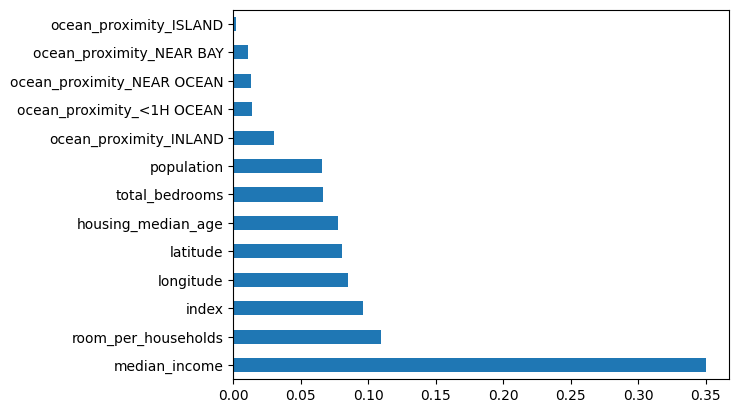

In [10]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()